<a href="https://colab.research.google.com/github/ArquimedesG/Machine_Learning_Colabs/blob/main/CDC_Diabetes_Health_Indicators.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## CDC Diabetes Health Indicators

### Based on Results from Phone Surveys Performed Across the US Annually


#### Analysis performed by: Arquimedes Godoy

###Data Set Selection

- **Dataset:** Diabetes Health Indicators Dataset (50/50 Split Dataset)
- **Source:** Kaggle https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset
- **Description:** The Behavioral Risk Factor Surveillance System (BRFSS) is a health-related telephone survey that is collected annually by the CDC.

  A csv of the dataset available on Kaggle for the year 2015 was used.

  *diabetes _ binary _ 5050split _ health _ indicators _ BRFSS2015.csv* is a clean dataset of **70,692 survey responses** to the CDC's BRFSS2015.

  It has an equal 50-50 split of respondents with no diabetes and with either prediabetes or diabetes.

  The target variable *Diabetes_binary* has **2 classes**: **0** is for **no diabetes**, and **1** is for **prediabetes or diabetes**.
  
  This dataset has **21 feature variables** and is balanced.

  
**Dataset Initial Exploration:**

- **Dimensions:** 70692 instances, 21 characteristics.
- **Type of Variables:**
  
  Fourteen characteristics are discrete and binary: *0*: No / *1*: Yes
      HighBP, HighChol, CholCheck, Smoker, Stroke, HeartDiseaseorAttack,
      PhysActivity, Fruits, Veggies, HvyAlcoholConsump, AnyHealthcare, NoDocbcCost,
      DiffWalk and Sex

   Seven characteristics are numeric and categorical:
      BMI             12 - 98
      GenHlth         1 - 5
      MentHlth        0 - 30
      PhysHlth        0 - 30
      Age             1 - 13
      Education       1 - 6
      Income          1 - 8

  The response *Diabetes_binary* is categorical and binary (*0*: No, *1*: Yes)
- **Missing Data:** No missing data.  It is a clean file.
- **Basic Statistics:**

*Histograms*:

  Binary characteristics *HighBP*, *HighChol*, *Smoker* and *Sex* have similar number of elements for both possible levels.

  Binary characteristics *PhysActivity* and *Fruits* have slightly more elements from one level than the other.

  Binary characteristics *CholCheck*, *Stroke*, *HeartDiseaseorAttack*, *Veggies*, *HvyAlcoholConsump*, *AnyHealthcare*, *NoDocbcCost* and *DiffWalk* have a significant number of elements from one specific level.

  Categorical characteristics *Education* and *Income* have a negatively skewed distribution with the mean value toward the highest levels.

  Categorical characteristic *Age* has a slighlty negatively skewed distribution with the mean value at the middle of the range (7.5).

  Categorical characteristics *BMI* and *GenHlth* show a "normal" shape distribution with a mean around 25 and 3, respectively.

  Categorical characteristics *MentHlth* and *PhysHlth* have a positively skewed distribution with the mean value toward the lowest levels.

*Correlation Matrix*:

   The strongest positive correlation observed is between *GenHlth* and *PhysHlth* (0.55).

   There appears to be correlation between *PhysHlth* and *DiffWalk* (0.49), between *GenHlth* and *DiffWalk* (0.48) and between *Income* and *Education* (0.46)

   The strongest negative correlation are between *GenHlth* and *Income* (-0.38) and between *Income* and *DiffWalk* (-0.34).


**Algorithm Selection:**
   This is a classification-type problem where we need to determine, based on the inputs, whether or not a patient can be classified as diabetic. (Two classes)

- **Selected Algorithm:** Logistic Regression, Linear Discriminant Analysis (LDA) and others.

**Choice Justification:**
- **Problem Nature:** This is a classification problem with two possible outcomes.
- **Data Type and Distribution:** As mentioned previously, in the initial models, there are 14 binary characteristics and 7 categorical characteristics.
After evaluating the intial model, the number of variables will be reduced by eliminating those with high p-value and checking if the performance remains similar.
- **Dataset Size:** Dataset size is reasonable, having a little over 35K entries for each possible outcome.
- **Model Complexity and Capacity:** The models to try are simple but can manage the complexity of the problem
- **Computational Cost:** Computational cost is low by using these models

**Results:**
- The initial model using a Logistic Regression model had a total of 21 characteristics.

-  The number of characteristics was reduced down to 15 by eliminating the ones showing a high p-value.

-  The model with the remaining characteristics has similar precision, recall and f1-score values as the initial model.

- Besides Logistic Regression, other models: Linear Discriminant Analysis (LDA), Quadratic Discriminant Analysis (QDA), Naive Bayes and KNN using k from 1 to 10 were tested.

-  The best results were obtained with Logistic Regression and LDA models.

-  The resulting model does NOT have a high capability of prediction because about 25% of the time it would predict erroneously.  This is especially bad when predicting False Negatives because it will indicate that the patient does not have diabetes when indeed he has diabetes.

-  However, based on these results, it can be proposed to reduce the number of questions in the survey to eliminate the ones not providing significant information: *Smoker*, *PhysActivity*, *Fruits*, *NoDocbcCost*
  Three more variables showing significant collinearity and low coeffcient effect can alos be eliminated: *Education*, *Income* and *Menthal Health*

**Conclusions:**

   The model obtained using the data from the surveys can be used as a reference as an indication of risk of diabetes but, due to the high number of false predictions, it cannot be considered as the only tool to determine whether a person is diabetic or not.

   Maybe a more complex model like a neural network can get better predictions with the current data or more significant variables need to be added to the survey to improve the predictions.

   However, the results have proved that the number of questions in the survey can be reduced and still obtain the same results in the model.


In [1]:
#  Importing required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math

from scipy.stats import multivariate_normal
#  Importing statsmodel.api
import statsmodels.api as sm
#  Importing statmodels.formula.api
import statsmodels.formula.api as smf

# Importing SciKit Learn Libraries
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import neighbors

from statsmodels.stats.outliers_influence \
import variance_inflation_factor as VIF

In [4]:
# Loading the file into a dataset "Diabetes"
Diabetes=pd.read_csv('diabetes_binary_5050split_health_indicators_BRFSS2015.csv')
Diabetes.shape

(70692, 22)

In [5]:
Diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Diabetes_binary       70692 non-null  float64
 1   HighBP                70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  float64
 6   Stroke                70692 non-null  float64
 7   HeartDiseaseorAttack  70692 non-null  float64
 8   PhysActivity          70692 non-null  float64
 9   Fruits                70692 non-null  float64
 10  Veggies               70692 non-null  float64
 11  HvyAlcoholConsump     70692 non-null  float64
 12  AnyHealthcare         70692 non-null  float64
 13  NoDocbcCost           70692 non-null  float64
 14  GenHlth               70692 non-null  float64
 15  MentHlth           

In [6]:
# Removing rows with NaNs (if any)
Diabetes=Diabetes.dropna()
Diabetes.shape

(70692, 22)

In [7]:
cols=Diabetes.columns
cols

Index(['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [8]:
Diabetes.describe()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,...,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000
mean,0.500000,0.563458,0.525703,0.975259,29.856985,0.475273,0.062171,0.147810,0.703036,0.611795,...,0.954960,0.093914,2.837082,3.752037,5.810417,0.252730,0.456997,8.584055,4.920953,5.698311
std,0.500004,0.495960,0.499342,0.155336,7.113954,0.499392,0.241468,0.354914,0.456924,0.487345,...,0.207394,0.291712,1.113565,8.155627,10.062261,0.434581,0.498151,2.852153,1.029081,2.175196
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,7.000000,4.000000,4.000000
50%,0.500000,1.000000,1.000000,1.000000,29.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,9.000000,5.000000,6.000000
75%,1.000000,1.000000,1.000000,1.000000,33.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,4.000000,2.000000,6.000000,1.000000,1.000000,11.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


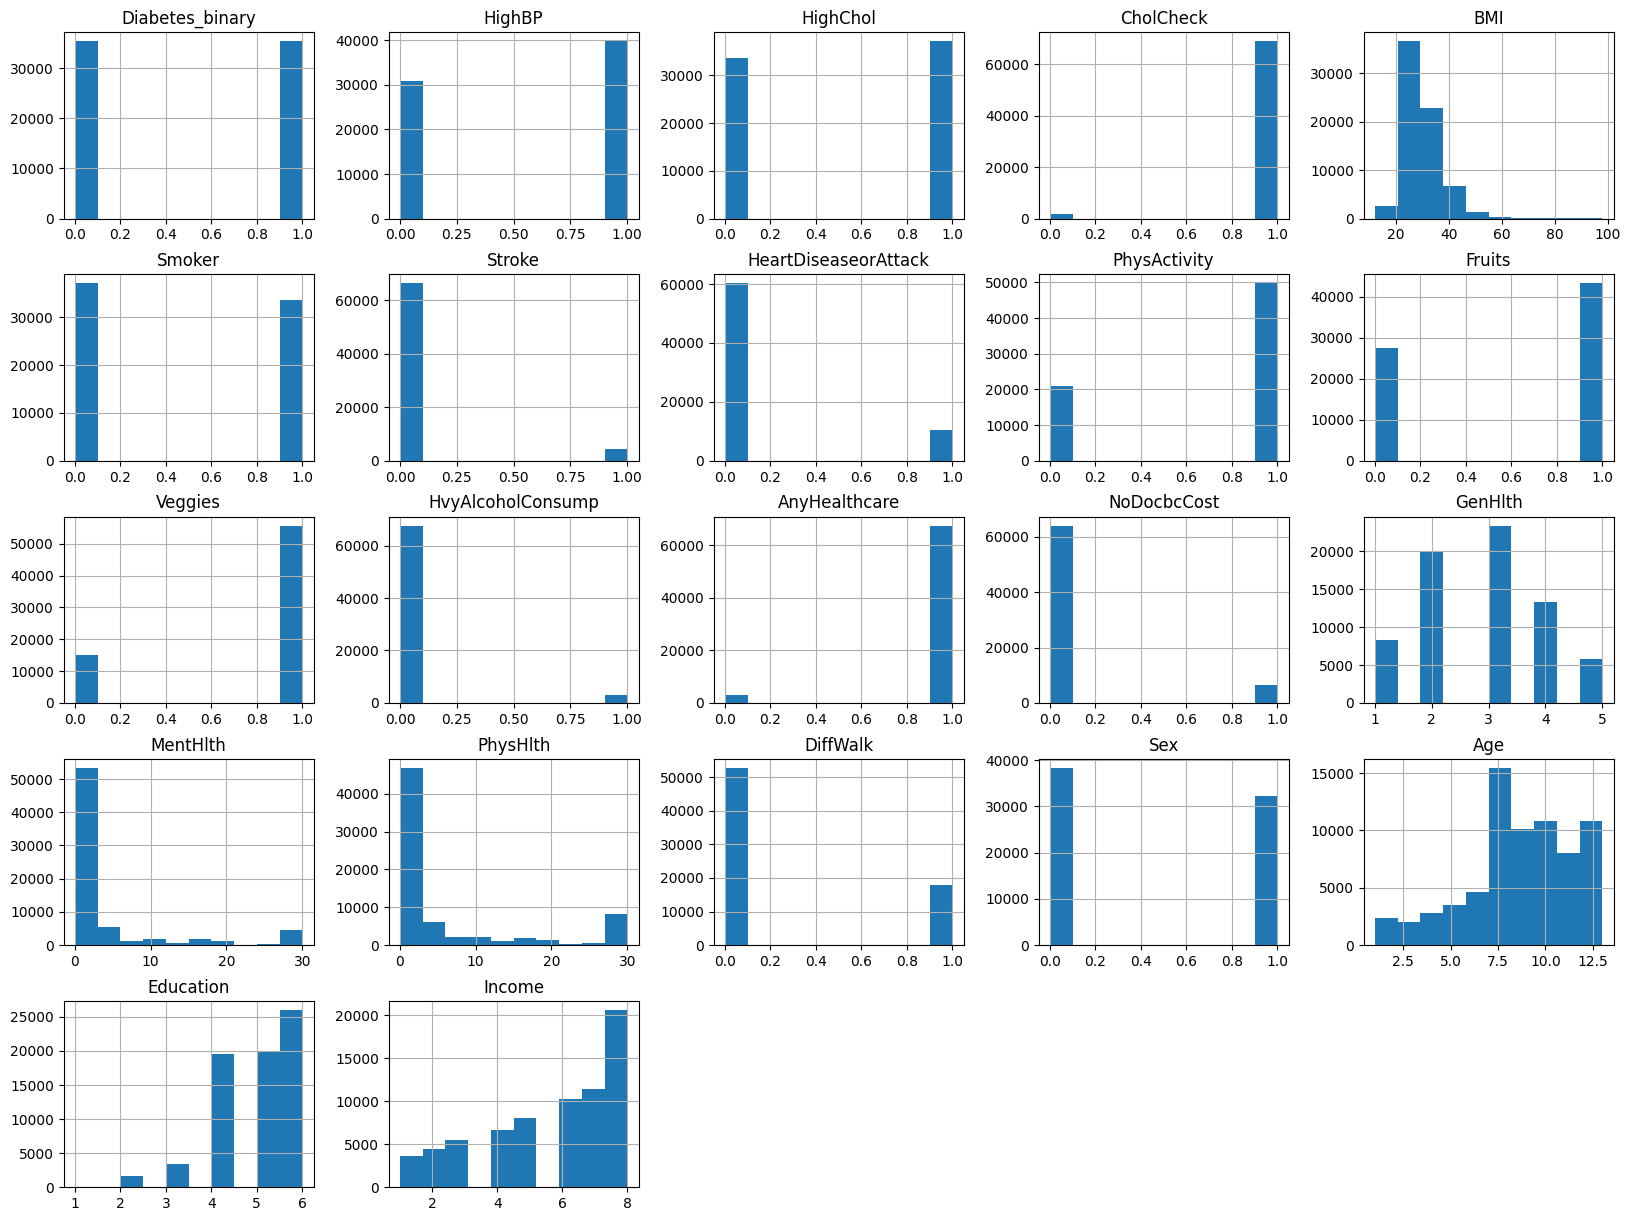

In [9]:
Diabetes.hist(figsize=(20,15));

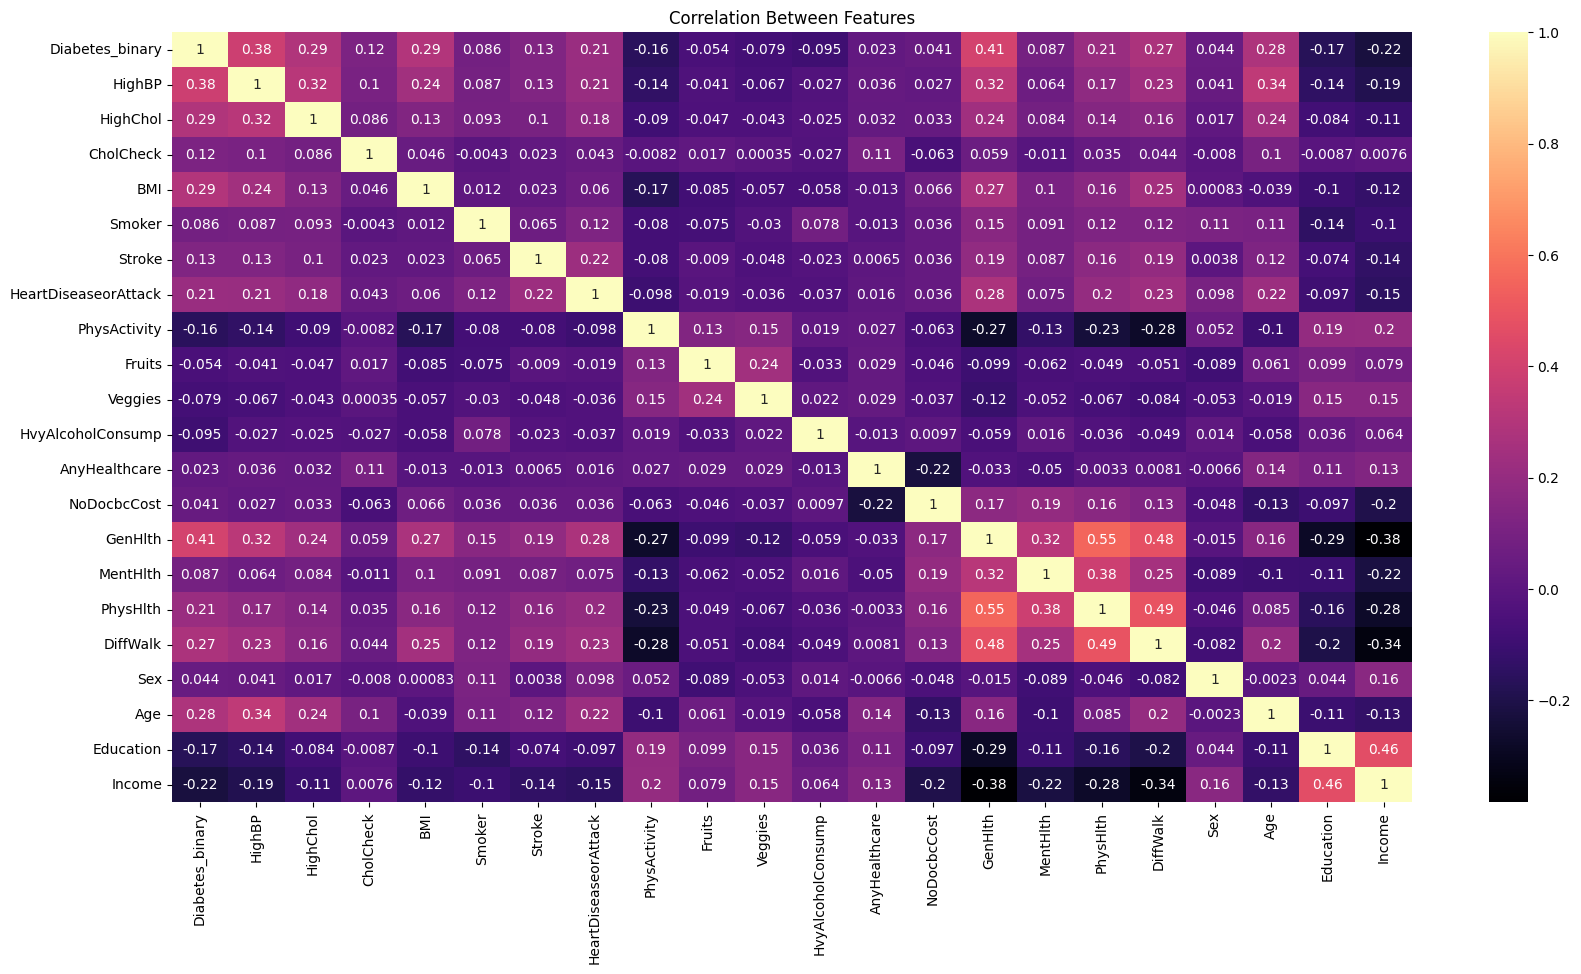

In [10]:
# Correlation Heat map

plt.figure(figsize = (20,10))
sns.heatmap(Diabetes.corr(),annot=True , cmap ='magma' )
plt.title("Correlation Between Features");

In [ ]:
pd.plotting.scatter_matrix(Diabetes, figsize=(100,100));

### Creating Input and Output Arrays

In [ ]:
X=Diabetes.drop('Diabetes_binary', axis=1)
Y=Diabetes.Diabetes_binary


### Splitting the Data into Train and Test Arrays

In [ ]:
X_Train, X_Test, Y_Train, Y_Test = train_test_split (X, Y)


### Initial Model Trial

Logistic Regression Model with All Variables Included

In [ ]:
model=LogisticRegression(max_iter=1000)
model.fit(X_Train, Y_Train)

In [ ]:
#  Predicting Outputs with X_Test data
Y_pred = (model.predict_proba(X_Test)[:, 1] >= 0.5).astype(int)

In [ ]:
#  Creating the Confusion Matrix for Predicted vs. True Values
cm = confusion_matrix(Y_Test, Y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [False, True])
cm_display.plot()
plt.show()
print (cm)

The Logistic Regression model with all the variables on it is able to predict correctly several values but still there several incorrect predictions.



In [ ]:
matrix = classification_report(Y_Test,Y_pred )
print(matrix)

The Classification report shows that the accuracy is 0.75 for this model.

In [ ]:
acc=[]
err_def=[]
err_non_def=[]
sensitivity=[]
thres=np.linspace(0,1,100)
for pp in thres:
    y_pred = (model.predict_proba(X_Test)[:, 1] >= pp).astype(int)
    acc.append(1-(accuracy_score(Y_Test, y_pred)))
    cm = confusion_matrix(Y_Test, y_pred)
    err_def.append(cm[1,0]/(cm[1,0]+cm[1,1]))
    err_non_def.append(cm[0,1]/(cm[0,0]+cm[0,1]))
    sensitivity.append(cm[1,1]/(cm[1,0]+cm[1,1]))
 #   l_specifity. append(1-err_non_def)

plt.plot(thres, acc, color="black", linestyle='solid',
         label="Overall")
plt.plot(thres, err_def, color="blue", linestyle='dashed',
         label="Diabetic Patients Incorrectly Classified")
plt.plot(thres, err_non_def, color="orange", linestyle=(0,(1,10)),
         label="Non-Diabetic Incorrectly Classified",
         marker=".", markersize=5)
plt.legend(loc='best')
plt.xlabel("Threshold")
plt.ylabel("Error Rate")
plt.show();

In [ ]:
plt.plot(err_non_def, sensitivity, color="blue", linestyle="solid",
         label="Non-Diabetic Customers Incorrectly Classified",
         marker=".", markersize=5)

plt.xlabel("False Positive Rate (1 - Specificity)")
plt.ylabel("True Positive Rate (Sensitivity)")
plt.title("ROC Curve");

### Coefficients Analysis for Initial Model

In [ ]:
Data=X_Train.copy()
Data['Diabetes_binary']=Y_Train.copy()
#  Constructing the model matrix with all variables
model2 = smf.logit(formula='Diabetes_binary ~ HighBP + HighChol + CholCheck + BMI + Smoker + Stroke + HeartDiseaseorAttack + PhysActivity + Fruits + Veggies + HvyAlcoholConsump + AnyHealthcare + NoDocbcCost + GenHlth + MentHlth + PhysHlth + DiffWalk + Sex + Age + Education + Income', data=Data)

#  Fitting the model
results2 = model2.fit()
print(results2.summary())


By looking at the p-values, the terms: *Smoker*, *PhysActivity*, *Fruits*, *AnyHealthcare* and *NoDocbcCost* appear not to be significant to predict the outcome.

  Therefore a simplified, model removing those terms will be evaluated.

In [ ]:
vals = [VIF(X_Train, i)
        for i in range(0, X_Train.shape[1])]
vif = pd.DataFrame({'vif':vals},
                   index=X_Train.columns[0:])
vif

Calculating the Variance Inflation Factor (VFI) of each of the characteristics,it appears to be collinearity with variables: *CholCheck*, *Education*, *AnyHealthcare* and *BMI*.

However, the correlation levels with other variables are not too high.

### Second Model: Eliminating Variables with High p-values: *Smoker*, *PhysActivity*, *AnyHealthcare*, *NoDocbcCost*

In [ ]:
#  Constructing the model matrix eliminating 'Smoker', 'PhysActivity', 'AnyHealthcare', 'NoDocbcCost' variables
model3 = smf.logit(formula='Diabetes_binary ~ HighBP + HighChol + CholCheck + BMI +  Stroke + HeartDiseaseorAttack +   Veggies + HvyAlcoholConsump +  GenHlth + MentHlth + PhysHlth + DiffWalk + Sex + Age + Education + Income', data=Data)

#  Fitting the model
results3 = model3.fit()
print(results3.summary())

Training the model with reduced variables

In [ ]:
X_Train4 = X_Train.drop([ 'Smoker', 'PhysActivity', 'AnyHealthcare', 'NoDocbcCost', 'Fruits'], axis=1)
X_Test4 = X_Test.drop(['Smoker', 'PhysActivity', 'AnyHealthcare', 'NoDocbcCost', 'Fruits'], axis=1)

In [ ]:
clf4=LogisticRegression(max_iter=1000)
clf4.fit(X_Train4, Y_Train)

In [ ]:
#  Predicting Outputs with X_Test data
Y_pred4 = (clf4.predict_proba(X_Test4)[:, 1] >= 0.5).astype(int)

In [ ]:
#  Creating the Confusion Matrix for Predicted vs. True Values
cm = confusion_matrix(Y_Test, Y_pred4)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [False, True])
cm_display.plot()
plt.show()
print (cm)


In [ ]:
matrix = classification_report(Y_Test,Y_pred4 )
print(matrix)

This model with a reduced number of variables has similar accuracy as the model with all the variables in it.

In [ ]:
acc=[]
err_def=[]
err_non_def=[]
sensitivity=[]
thres=np.linspace(0,1,100)
for pp in thres:
    y_pred4 = (clf4.predict_proba(X_Test4)[:, 1] >= pp).astype(int)
    acc.append(1-(accuracy_score(Y_Test, y_pred4)))
    cm = confusion_matrix(Y_Test, y_pred4)
    err_def.append(cm[1,0]/(cm[1,0]+cm[1,1]))
    err_non_def.append(cm[0,1]/(cm[0,0]+cm[0,1]))
    sensitivity.append(cm[1,1]/(cm[1,0]+cm[1,1]))
 #   l_specifity. append(1-err_non_def)

plt.plot(thres, acc, color="black", linestyle='solid',
         label="Overall")
plt.plot(thres, err_def, color="blue", linestyle='dashed',
         label="Diabetic Patients Incorrectly Classified")
plt.plot(thres, err_non_def, color="orange", linestyle=(0,(1,10)),
         label="Non-Diabetic Incorrectly Classified",
         marker=".", markersize=5)
plt.legend(loc='best')
plt.xlabel("Threshold")
plt.ylabel("Error Rate")
plt.show();

In [ ]:
plt.plot(err_non_def, sensitivity, color="blue", linestyle="solid",
         label="Non-Diabetic Customers Incorrectly Classified",
         marker=".", markersize=5)

plt.xlabel("False Positive Rate (1 - Specificity)")
plt.ylabel("True Positive Rate (Sensitivity)")
plt.title("ROC Curve");

In [ ]:
vals = [VIF(X_Train4, i)
        for i in range(0, X_Train4.shape[1])]
vif = pd.DataFrame({'vif':vals},
                   index=X_Train4.columns[0:])
vif

### Third Model: Eliminating Variables with High Collinearity and low coefficient value: *Education*, *Income* and *MentHlth*

In [ ]:
#  Constructing the model matrix eliminating 'Education',   'MentHlth' variables
model5 = smf.logit(formula='Diabetes_binary ~ HighBP + HighChol + CholCheck + BMI +  Stroke + HeartDiseaseorAttack + Veggies + HvyAlcoholConsump + GenHlth + PhysHlth + DiffWalk + Sex + Age', data=Data)

#  Fitting the model
results5 = model5.fit()
print(results5.summary())

In [ ]:
X_Train5=X_Train4.drop(['Education','MentHlth', 'Income'], axis=1) #, , 'BMI'
X_Test5=X_Test4.drop(['Education','MentHlth', 'Income'], axis=1)
vals = [VIF(X_Train5, i)
        for i in range(0, X_Train5.shape[1])]
vif = pd.DataFrame({'vif':vals},
                   index=X_Train5.columns[0:])
vif

In [ ]:
clf5=LogisticRegression(max_iter=1000)
clf5.fit(X_Train5, Y_Train)

In [ ]:
#  Predicting Outputs with X_Test data
Y_pred5 = (clf5.predict_proba(X_Test5)[:, 1] >= 0.5).astype(int)

In [ ]:
#  Creating the Confusion Matrix for Predicted vs. True Values
cm = confusion_matrix(Y_Test, Y_pred5)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [False, True])
cm_display.plot()
plt.show()
print (cm)

In [ ]:
matrix = classification_report(Y_Test,Y_pred5 )
print(matrix)

## Alternate Models

### Linear Discriminant Analysis (LDA) Model



In [ ]:
model=LDA()
model.fit(X_Train5, Y_Train)
Y_pred5 = (model.predict_proba(X_Test5)[:, 1] >= 0.5).astype(int)
cm = confusion_matrix(Y_Test, Y_pred5)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ['Non-Diabetic', 'Diabetic'])
cm_display.plot()
plt.show()

In [ ]:
matrix = classification_report(Y_Test,Y_pred5)
print(matrix)

### Quadratic Discriminant Analysis (QDA) Model

In [ ]:
model=QDA()
model.fit(X_Train5, Y_Train)
Y_pred5 = (model.predict_proba(X_Test5)[:, 1] >= 0.5).astype(int)
cm = confusion_matrix(Y_Test, Y_pred5)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ['Non-Diabetic', 'Diabetic'])
cm_display.plot()
plt.show()

In [ ]:
matrix = classification_report(Y_Test,Y_pred5)
print(matrix)

### Naive Bayes Model

In [ ]:
model=GaussianNB()
model.fit(X_Train5, Y_Train)
Y_pred5 = (model.predict_proba(X_Test5)[:, 1] >= 0.5).astype(int)
cm = confusion_matrix(Y_Test, Y_pred5)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ['Non-Diabetic', 'Diabetic'])
cm_display.plot()
plt.show()

In [ ]:
matrix = classification_report(Y_Test,Y_pred5)
print(matrix)

### KNN Models

In [ ]:
for i in range (1,11):
  model=KNeighborsClassifier(n_neighbors=i)
  model.fit(X_Train5, Y_Train)
  Y_pred5 = (model.predict_proba(X_Test5)[:, 1] >= 0.5).astype(int)
  cm = confusion_matrix(Y_Test, Y_pred5)
  print()
  print("Neighbors =", i)
  matrix = classification_report(Y_Test,Y_pred5)
  print(matrix)